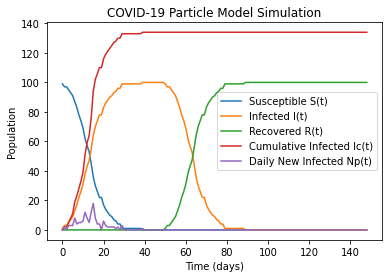

In [19]:
from numpy import *
from pylab import *

N = 100
T = 150
x = zeros(N)
y = zeros(N)
vx = zeros(N)
vy = zeros(N)
s = zeros(N) # states
R = zeros(N) # recovery counters

Ic = zeros(T) # cumulative infected
recovery = 50
dt = 1
speed = 0.02
distance = 0.03

def dist(p, q):
    return sqrt((p[0] - q[0])**2 + (p[1] - q[1])**2)

# Initialization
for p in range(N):
    x[p] = rand()/2
    y[p] = rand()/2
    theta = 2*pi*rand()
    vx[p] = speed * cos(theta)
    vy[p] = speed * sin(theta)

x[0] = 0.25
y[0] = 0.25
s[0] = 1

S_t = []
I_t = []
R_t = []
Ic_t = []
Np_t = []

for t in range(1, T):
    newinfection = 0
    
    for p in range(N):
        x[p] = x[p] + dt*vx[p]
        y[p] = y[p] + dt*vy[p]
        if x[p] >= 0.45 or x[p] <= 0.05:
            vx[p] = -vx[p]
        if y[p] >= 0.45 or y[p] <= 0.05:
            vy[p] = -vy[p]
    
    stmp = s.copy()
    
    # Infection spread
    for p in range(N):
        for q in range(N):
            if s[p] == 1 and s[q] == 0 and dist([x[p], y[p]], [x[q], y[q]]) <= distance:
                stmp[q] = 1
                newinfection += 1

    s = stmp.copy()
    
    # Recovery
    for p in range(N):
        if s[p] == 1:
            R[p] += 1
            if R[p] > recovery:
                s[p] = 2
    
    S_t.append(sum(s == 0))
    I_t.append(sum(s == 1))
    R_t.append(sum(s == 2))
    Ic[t] = Ic[t-1] + newinfection
    Ic_t.append(Ic[t])
    Np_t.append(newinfection)

figure()
plot(S_t, label='Susceptible S(t)')
plot(I_t, label='Infected I(t)')
plot(R_t, label='Recovered R(t)')
plot(Ic_t, label='Cumulative Infected Ic(t)')
plot(Np_t, label='Daily New Infected Np(t)')
legend()
xlabel('Time (days)')
ylabel('Population')
title('COVID-19 Particle Model Simulation')
show()


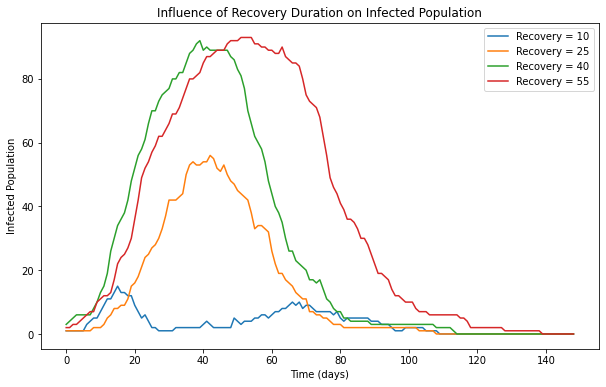

In [22]:
def simulate_for_recovery(recovery_value):
    
    local_x = zeros(N)
    local_y = zeros(N)
    local_vx = zeros(N)
    local_vy = zeros(N)
    local_s = zeros(N) # states
    local_R = zeros(N) # recovery counters
    Ic = zeros(T)
    
    for p in range(N):
        local_x[p] = rand()/2
        local_y[p] = rand()/2
        theta = 2*pi*rand()
        local_vx[p] = speed * cos(theta)
        local_vy[p] = speed * sin(theta)

    local_x[0] = 0.25
    local_y[0] = 0.25
    local_s[0] = 1

    S_t = []
    I_t = []
    R_t = []

    for t in range(1, T):
        newinfection = 0
        
    
        for p in range(N):
            local_x[p] = local_x[p] + dt*local_vx[p]
            local_y[p] = local_y[p] + dt*local_vy[p]
            if local_x[p] >= 0.45 or local_x[p] <= 0.05:
                local_vx[p] = -local_vx[p]
            if local_y[p] >= 0.45 or local_y[p] <= 0.05:
                local_vy[p] = -local_vy[p]

        stmp = local_s.copy()

        # Infection spread
        for p in range(N):
            for q in range(N):
                if local_s[p] == 1 and local_s[q] == 0 and dist([local_x[p], local_y[p]], [local_x[q], local_y[q]]) <= distance:
                    stmp[q] = 1
                    newinfection += 1

        local_s = stmp.copy()

        # Recovery
        for p in range(N):
            if local_s[p] == 1:
                local_R[p] += 1
                if local_R[p] > recovery_value:
                    local_s[p] = 2

        # Collect data for plots
        S_t.append(sum(local_s == 0))
        I_t.append(sum(local_s == 1))
        R_t.append(sum(local_s == 2))

    return S_t, I_t, R_t

recovery_values = [10, 25, 40, 55]

plt.figure(figsize=(10, 6))
for recovery_value in recovery_values:
    S_t, I_t, R_t = simulate_for_recovery(recovery_value)
    plt.plot(I_t, label=f'Recovery = {recovery_value}')

plt.xlabel('Time (days)')
plt.ylabel('Infected Population')
plt.title('Influence of Recovery Duration on Infected Population')
plt.legend()
plt.show()

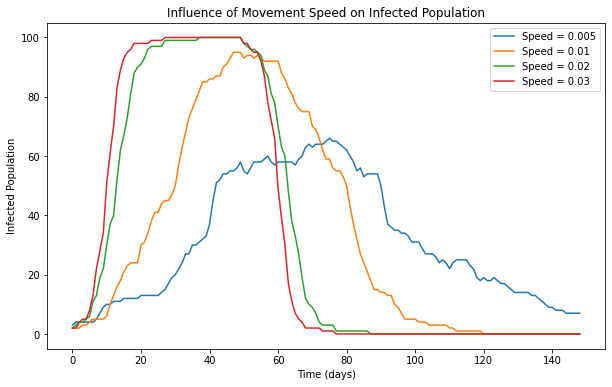

In [23]:
def simulate_for_speed(speed_value):
    
    local_x = zeros(N)
    local_y = zeros(N)
    local_vx = zeros(N)
    local_vy = zeros(N)
    local_s = zeros(N) # states
    local_R = zeros(N) # recovery counters
    Ic = zeros(T)
    
    for p in range(N):
        local_x[p] = rand()/2
        local_y[p] = rand()/2
        theta = 2*pi*rand()
        local_vx[p] = speed_value * cos(theta)
        local_vy[p] = speed_value * sin(theta)

    local_x[0] = 0.25
    local_y[0] = 0.25
    local_s[0] = 1

    S_t = []
    I_t = []
    R_t = []

    for t in range(1, T):
        newinfection = 0
        
        
        for p in range(N):
            local_x[p] = local_x[p] + dt*local_vx[p]
            local_y[p] = local_y[p] + dt*local_vy[p]
            if local_x[p] >= 0.45 or local_x[p] <= 0.05:
                local_vx[p] = -local_vx[p]
            if local_y[p] >= 0.45 or local_y[p] <= 0.05:
                local_vy[p] = -local_vy[p]

        stmp = local_s.copy()

        # Infection spread
        for p in range(N):
            for q in range(N):
                if local_s[p] == 1 and local_s[q] == 0 and dist([local_x[p], local_y[p]], [local_x[q], local_y[q]]) <= distance:
                    stmp[q] = 1
                    newinfection += 1

        local_s = stmp.copy()

        # Recovery
        for p in range(N):
            if local_s[p] == 1:
                local_R[p] += 1
                if local_R[p] > recovery:
                    local_s[p] = 2

        # Collect data for plots
        S_t.append(sum(local_s == 0))
        I_t.append(sum(local_s == 1))
        R_t.append(sum(local_s == 2))

    return S_t, I_t, R_t

speed_values = [0.005, 0.01, 0.02, 0.03]

plt.figure(figsize=(10, 6))
for speed_value in speed_values:
    S_t, I_t, R_t = simulate_for_speed(speed_value)
    plt.plot(I_t, label=f'Speed = {speed_value}')

plt.xlabel('Time (days)')
plt.ylabel('Infected Population')
plt.title('Influence of Movement Speed on Infected Population')
plt.legend()
plt.show()


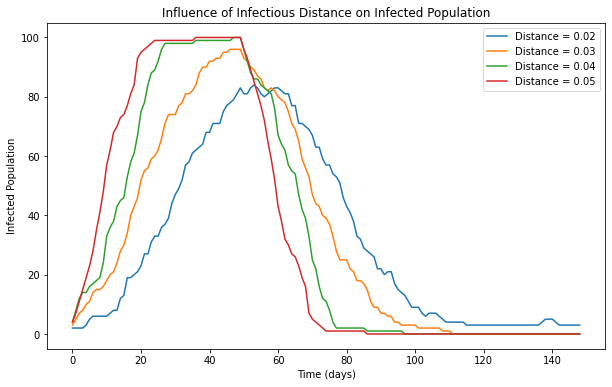

In [24]:
def simulate_for_distance(distance_value):
    
    local_x = zeros(N)
    local_y = zeros(N)
    local_vx = zeros(N)
    local_vy = zeros(N)
    local_s = zeros(N) # states
    local_R = zeros(N) # recovery counters
    Ic = zeros(T)
    
    for p in range(N):
        local_x[p] = rand()/2
        local_y[p] = rand()/2
        theta = 2*pi*rand()
        local_vx[p] = speed * cos(theta)
        local_vy[p] = speed * sin(theta)

    local_x[0] = 0.25
    local_y[0] = 0.25
    local_s[0] = 1

    S_t = []
    I_t = []
    R_t = []

    for t in range(1, T):
        newinfection = 0
        
    
        for p in range(N):
            local_x[p] = local_x[p] + dt*local_vx[p]
            local_y[p] = local_y[p] + dt*local_vy[p]
            if local_x[p] >= 0.45 or local_x[p] <= 0.05:
                local_vx[p] = -local_vx[p]
            if local_y[p] >= 0.45 or local_y[p] <= 0.05:
                local_vy[p] = -local_vy[p]

        stmp = local_s.copy()

        # Infection spread
        for p in range(N):
            for q in range(N):
                if local_s[p] == 1 and local_s[q] == 0 and dist([local_x[p], local_y[p]], [local_x[q], local_y[q]]) <= distance_value:
                    stmp[q] = 1
                    newinfection += 1

        local_s = stmp.copy()

        # Recovery
        for p in range(N):
            if local_s[p] == 1:
                local_R[p] += 1
                if local_R[p] > recovery:
                    local_s[p] = 2

        # Collect data for plots
        S_t.append(sum(local_s == 0))
        I_t.append(sum(local_s == 1))
        R_t.append(sum(local_s == 2))

    return S_t, I_t, R_t

distance_values = [0.02, 0.03, 0.04, 0.05]

plt.figure(figsize=(10, 6))
for distance_value in distance_values:
    S_t, I_t, R_t = simulate_for_distance(distance_value)
    plt.plot(I_t, label=f'Distance = {distance_value}')

plt.xlabel('Time (days)')
plt.ylabel('Infected Population')
plt.title('Influence of Infectious Distance on Infected Population')
plt.legend()
plt.show()


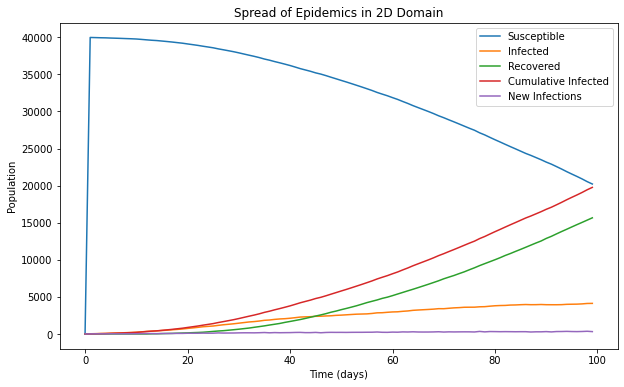

In [25]:
from numpy import *
from pylab import *
from random import *


# 2D CA for epidemics
Nr = 200
Nc = 200
T = 100
recovery = 14
N = Nr * Nc
s = zeros((Nr, Nc))
R = zeros((Nr, Nc))
SP = zeros(T)
RP = zeros(T)
IP = zeros(T)
NP = zeros(T)
Ic = zeros(T)
sd = 0.5  # social distancing

for i in range(20):
    indr = randint(1, Nr-2)
    indc = randint(1, Nc-2)
    s[indr, indc] = 1
    R[indr, indc] = 1

D = zeros((Nr, Nc))
for t in range(1, T):
    for i in range(Nc):
        for j in range(Nr):
            D[i, j] = s[i, j]

    for i in range(1, Nc-1):
        for j in range(1, Nr-1):
            if s[i, j] == 0:
                num_inf = 0
                for n in [s[i+1, j], s[i-1, j], s[i, j+1], s[i, j-1]]:
                    if n == 1:
                        num_inf += 1
                p = num_inf / 4 * sd
                tmp = rand()
                if tmp <= p:
                    D[i, j] = 1
                    NP[t] += 1
                    R[i, j] = 1

            if s[i, j] == 1:
                R[i, j] += 1
                R[i, j] = min(recovery, R[i, j])
                if R[i, j] == recovery:
                    D[i, j] = 2

    for i in range(Nc):
        for j in range(Nr):
            s[i, j] = D[i, j]

    SP[t] = sum(s == 0)
    IP[t] = sum(s == 1)
    RP[t] = sum(s == 2)
    Ic[t] = Ic[t-1] + NP[t]

   

# Plot populations vs time
plt.figure(figsize=(10, 6))
plt.plot(SP, label='Susceptible')
plt.plot(IP, label='Infected')
plt.plot(RP, label='Recovered')
plt.plot(Ic, label='Cumulative Infected')
plt.plot(NP, label='New Infections')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Spread of Epidemics in 2D Domain')
plt.legend()
plt.show()
